<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de Procesos Financieros. 

**Nombres:** Diego Alberto López Lazareno (Estudiante 1) y Esteban Márquez Delgado (Estudiante 2).

**Fecha:** 14 de octubre del 2021.

**Expediente** : IF722100, IF700637.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/diegolazareno/Proyecto_DALopez_EMarquez

# Proyecto TEMA-2

# 1.1 Valuación Intrínseca Probabilista:
## O Cómo Valorar Empresas Financieras Con Simulación Montecarlo

## 1.2 Objetivos

### 1.2.1 Objetivo General
+ 

### 1.2.2 Objetivos Específicos
+ 
+ 
+ 

## 1.3 Definición

<img src = "Diagrama.png" width = "760" height = "395">

In [2]:
#<img src = "Diagrama.png" width = "760px" height = "395px">

## 1.4 Nodos

## 1.5 Hipótesis & Supuestos

### 1.5.1 Definición de Hipótesis

### 1.5.2 Definición de Supuestos

## 1.6 Obtención De Bases De Datos

In [1]:
# Librerías necesarias
# Análisis y manejo de datos
import pandas as pd
import numpy as np

# Yfinance
import yfinance as yf

# Conexión a la API de Financial Modeling Prep
from pyfmpcloud import settings
from pyfmpcloud import company_valuation as cv
api_key = pd.read_csv("Data/apiKey_FMP.csv").iloc[0, 0]
settings.set_apikey(api_key)

# Filtrado de alertas
import warnings
warnings.filterwarnings("ignore")

## 1.7 Simulación

In [35]:
def intrisicValue(ticker, revenueGrowth1, priceToDividends):
    
    incomeStatement = cv.income_statement(ticker).iloc[0 : 5]
    cashflowStatement = cv.cash_flow_statement(ticker).iloc[0 : 5]
    
    # Primeros 5 años
    netProfitMargin_d = np.median(incomeStatement["netIncome"] / incomeStatement["revenue"])
    payoutRatio_d = np.median(abs(cashflowStatement["dividendsPaid"]) / incomeStatement["netIncome"])
    r = 0.075
    
    lastRevenues = incomeStatement["revenue"].iloc[0]
    estimatedRevenues1 = np.array([lastRevenues * (1 + revenueGrowth1) ** t for t in range(1, 6)])
    estimatedNetIncome1 = estimatedRevenues1 * netProfitMargin_d
    estimatedDividends1 = estimatedNetIncome1 * payoutRatio_d
    estimatedDividends1[-1] = estimatedDividends1[-1] + estimatedDividends1[-1] * priceToDividends
    dividendsPV = [dividend / ((1 + r) ** t) for dividend, t in zip(estimatedDividends1, range(1, 6))]
    
    intrinsicValuePerShare = sum(dividendsPV) / incomeStatement["weightedAverageShsOut"].iloc[0]
    
    return intrinsicValuePerShare 

In [40]:
intrisicValue("JPM", 2.5 / 100, 30)

96.24859674068266

In [15]:
df1 = incomeStatement = cv.income_statement("BAC").iloc[0 : 5]
df2 = cashflowStatement = cv.cash_flow_statement("BAC").iloc[0 : 5]

In [16]:
def intrisicValue(ticker, revenueGrowth1, revenueGrowth2, netProfitMargin_p, payoutRatio_p, priceToDividends, df1, df2):
    
    #incomeStatement = cv.income_statement(ticker).iloc[0 : 5]
    #cashflowStatement = cv.cash_flow_statement(ticker).iloc[0 : 5]
    incomeStatement = df1
    cashflowStatement = df2
    
    # Año 1 a 5: determinista
    netProfitMargin_d = np.median(incomeStatement["netIncome"] / incomeStatement["revenue"])
    payoutRatio_d = np.median(abs(cashflowStatement["dividendsPaid"]) / incomeStatement["netIncome"])
    r = 0.075
    
    lastRevenues = incomeStatement["revenue"].iloc[0]
    estimatedRevenues1 = np.array([lastRevenues * (1 + revenueGrowth1) ** t for t in range(1, 6)])
    estimatedNetIncome1 = estimatedRevenues1 * netProfitMargin_d
    estimatedDividends1 = estimatedNetIncome1 * payoutRatio_d
    dividendsPV1 = [dividend / ((1 + r) ** t) for dividend, t in zip(estimatedDividends1, range(1, 6))]
    
    # Año 6 a 10: probabilista
    estimatedRevenues2 = np.array([estimatedRevenues1[-1] * (1 + revenueGrowth2) ** t for t in range(1, 6)])
    estimatedNetIncome2 = estimatedRevenues2 * np.linspace(netProfitMargin_d, netProfitMargin_p, 5)
    estimatedDividends2 = estimatedNetIncome2 * np.linspace(payoutRatio_d, payoutRatio_p, 5)
    estimatedDividends2[-1] = estimatedDividends2[-1] + estimatedDividends2[-1] * priceToDividends
    dividendsPV2 = [dividend / ((1 + r) ** t) for dividend, t in zip(estimatedDividends2, range(6, 11))]
    
    intrinsicValuePerShare = (sum(dividendsPV1) + sum(dividendsPV2)) / incomeStatement["weightedAverageShsOut"].iloc[0]
    
    return intrinsicValuePerShare 

In [17]:
iv = [intrisicValue("BAC", 0.025, 0.02, np.random.uniform(0.05, 0.30), np.random.uniform(0.10, 0.75), 
                    np.random.uniform(10, 65), df1, df2) for i in range(10000)]

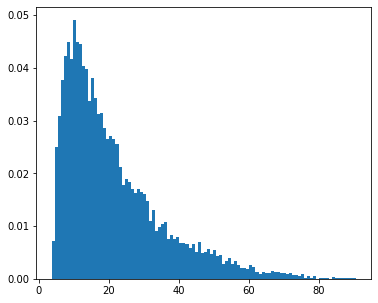

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 5))
plt.hist(iv, density = True, bins = 100);

In [19]:
np.mean(iv)

21.30581932081575

## 1.8 Visualización De Resultados de Simulación

## 1.9 Conclusiones

## 1.10 Referencias Consultadas